# Apply treshold to indentify lanes

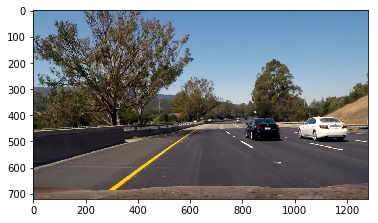

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('Yellow_Lane_Straight.jpg')
thresh = (180, 255)
plt.imshow(image)
plt.show()


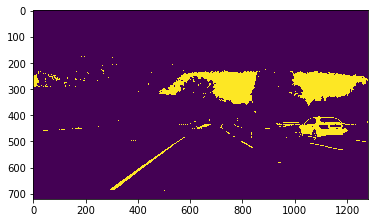

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
plt.imshow(binary)
plt.show()

# R Channel Tresholds

In [5]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

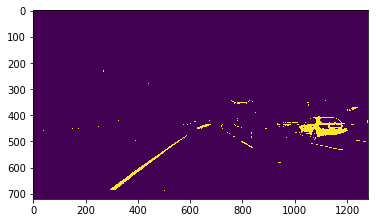

In [6]:
thresh = (200, 255)
r_binary = np.zeros_like(R)
r_binary[(R > thresh[0]) & (R <= thresh[1])] = 1
plt.imshow(r_binary)
plt.show()

# HLS Tresholds 

In [53]:
image = mpimg.imread('bridge_shadow.jpg')
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

#image1 = mpimg.imread('test4.jpg')
#S1 = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]

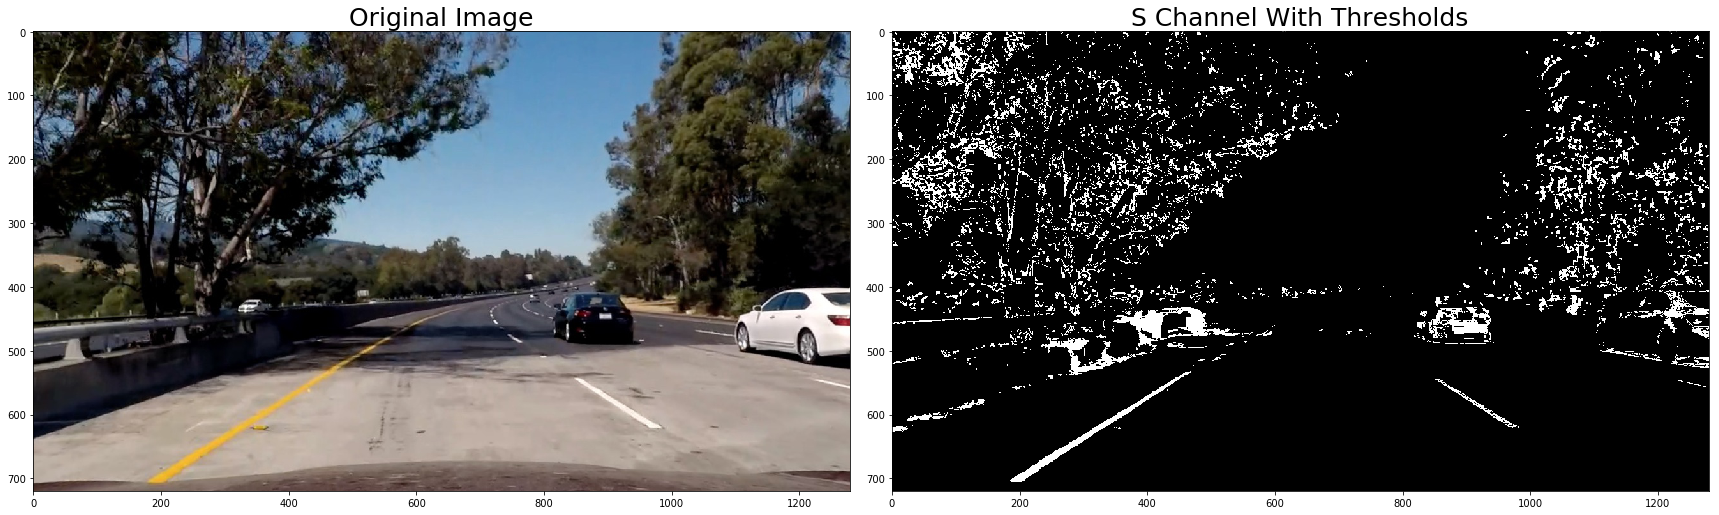

In [54]:
#thresh = (90, 255)
thresh = (170, 255)
s_binary = np.zeros_like(S)
s_binary[(S > thresh[0]) & (S <= thresh[1])] = 1


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(s_binary, cmap='gray')
ax2.set_title('S Channel With Thresholds', fontsize=25)
plt.show()

In [55]:
f.savefig('../006-Gradients-Color-Spaces/s_channel_thresholds.jpg')
plt.close(f)

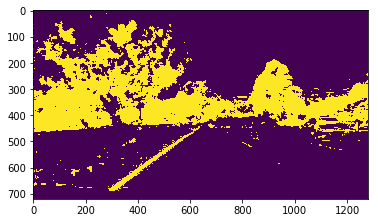

In [50]:
thresh = (15, 100)
h_binary = np.zeros_like(H)
h_binary[(H > thresh[0]) & (H <= thresh[1])] = 1
plt.imshow(h_binary)

# Sobel x

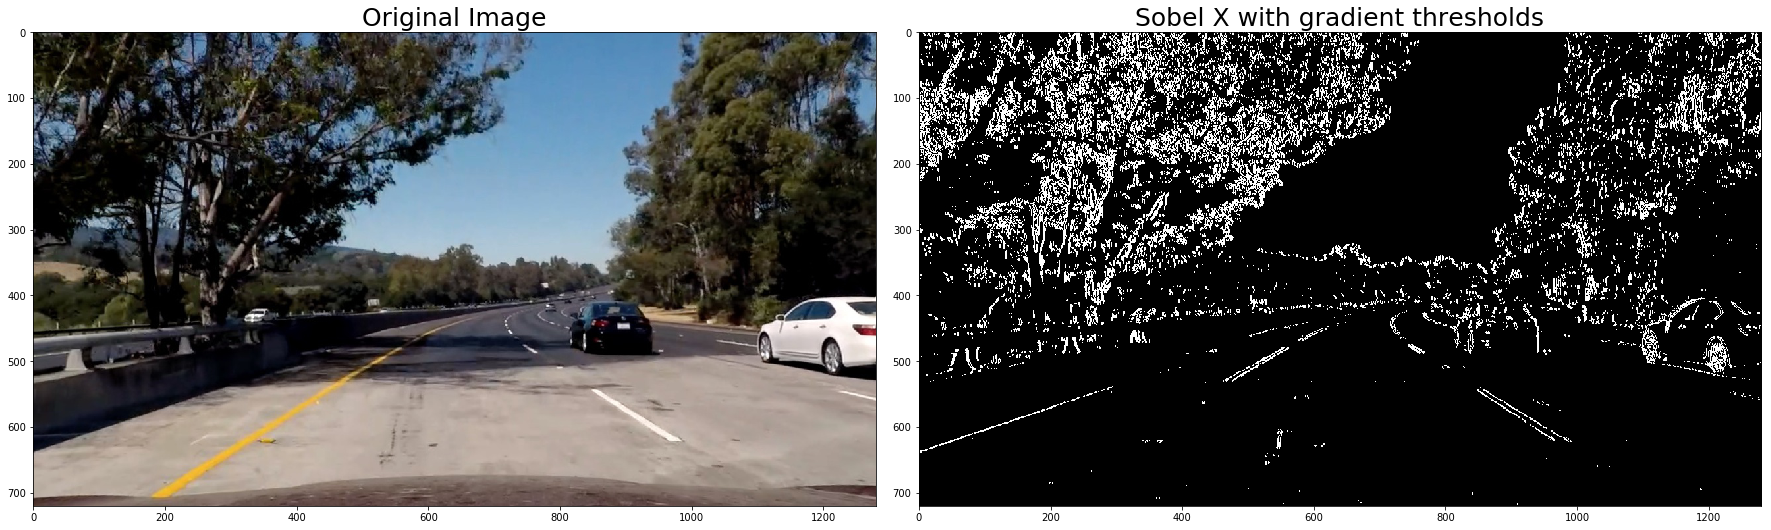

In [31]:

image = mpimg.imread('bridge_shadow.jpg')

# Edit this function to create your own pipeline.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

grad_x_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)

x_binary = np.zeros_like(grad_x_binary)
x_binary[(grad_x_binary == 1)] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(x_binary, cmap='gray')
ax2.set_title('Sobel X with gradient thresholds', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [32]:
f.savefig('../006-Gradients-Color-Spaces/Sobel-x_thresholds.jpg')
plt.close(f)

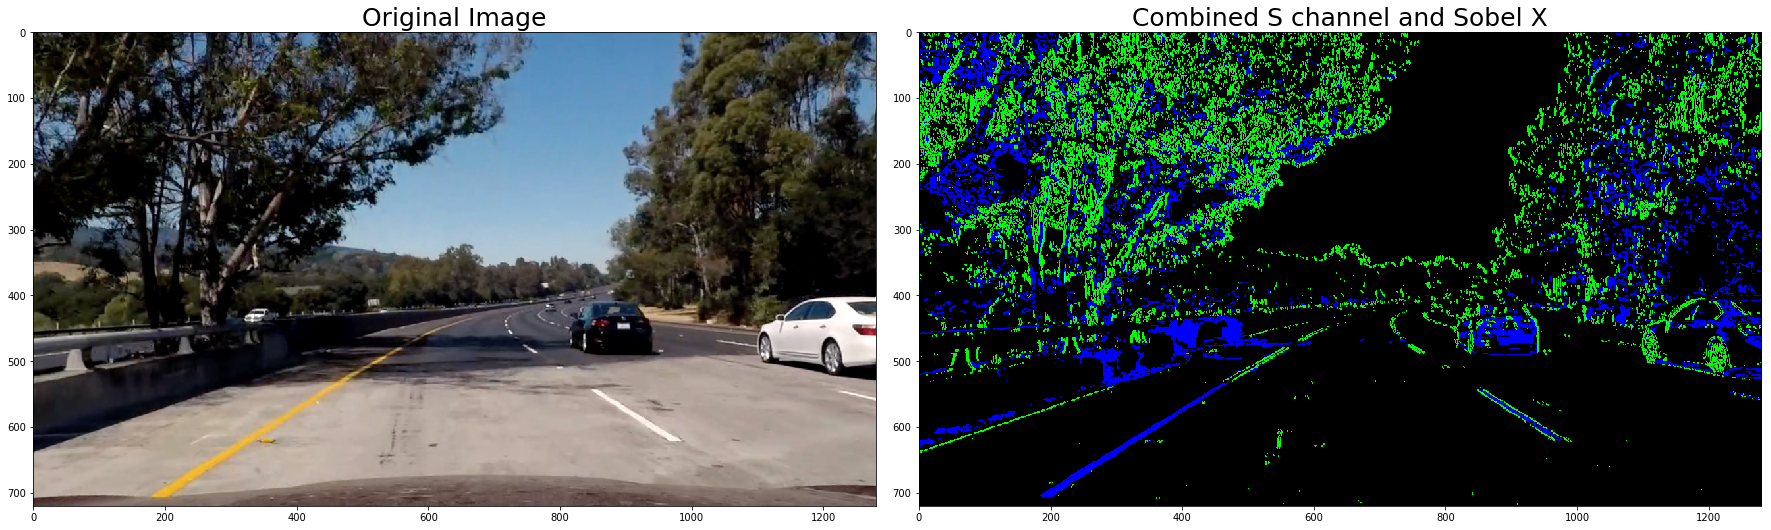

In [35]:

image = mpimg.imread('bridge_shadow.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(result,cmap='gray')
ax2.set_title('Combined S channel and Sobel X', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [36]:
f.savefig('../006-Gradients-Color-Spaces/Combined_Sobel-x_and_S-channels.jpg')
plt.close(f)

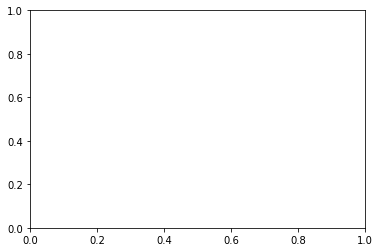

In [52]:
from matplotlib.patches import Ellipse

plt.figure()
ax = plt.gca()

ellipse = Ellipse(xy=(157.18, 68.4705), width=0.036, height=0.012, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)